In [93]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from astropy.cosmology import FlatLambdaCDM

#sns.set(font_scale=1.5, context='paper', style='white')
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"

In [55]:
pantheon_df = pd.read_csv('../analysis/test_files/Pantheon/hlsp_ps1cosmo_panstarrs_gpc1_all_model_v1_ancillary-g10.fitres', delim_whitespace=True)

zHD = pantheon_df.zHD.values
mB = pantheon_df.mB.values
c = pantheon_df.c.values
x1 = pantheon_df.x1.values

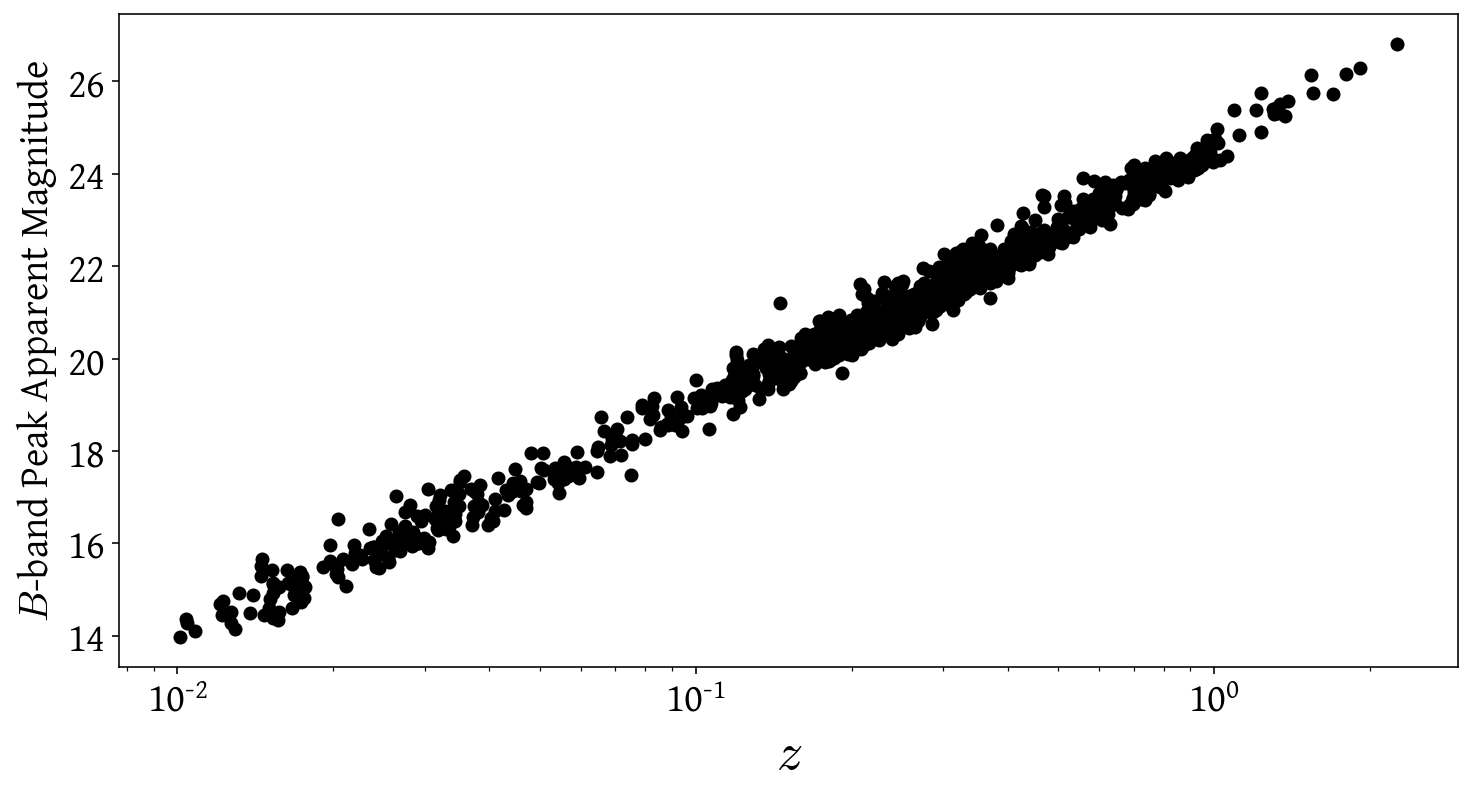

In [56]:
f, ax = plt.subplots(figsize=(12, 6))

ax.plot(zHD, mB, marker='o', ls='', color='k')

ax.set_ylabel(r'$B$-band Peak Apparent Magnitude', fontsize=20)
ax.set_xlabel('$z$', fontsize=26)
ax.tick_params(labelsize=20)
#ax.legend(fontsize=18)
ax.set_xscale('log')    

#plt.savefig('plots/k_correction.pdf', bbox_inches='tight')
plt.show()

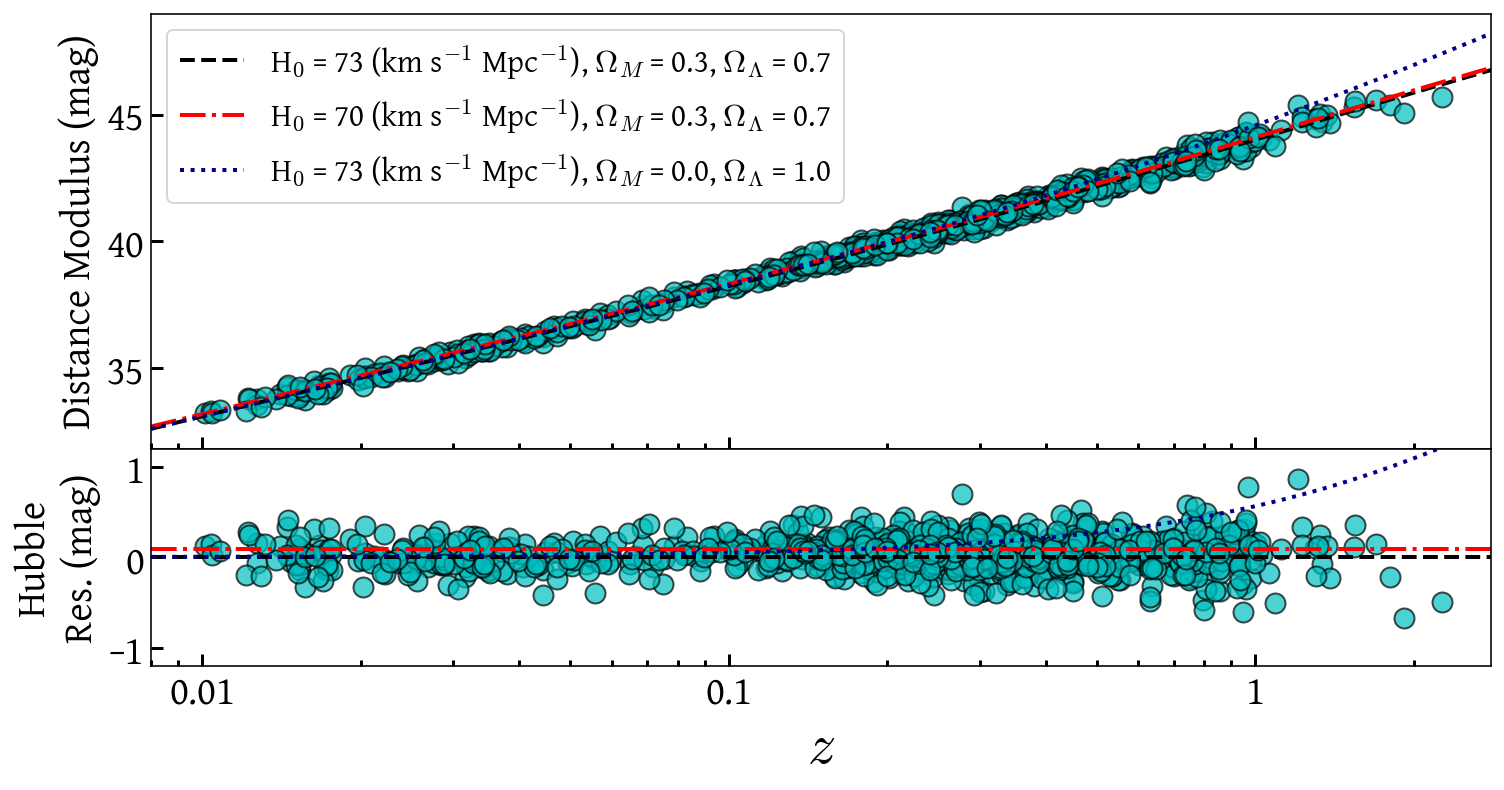

In [118]:
f, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Cosmology
z = np.arange(8e-3, 2.81, 0.01)
cosmo_local = FlatLambdaCDM(H0=73, Om0=0.3, Tcmb0=2.725)
cosmo_ave = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
cosmo_DE = FlatLambdaCDM(H0=73, Om0=0.0, Tcmb0=2.725)

mu_cosmo_local = cosmo_local.distmod(z).value
mu_cosmo_ave = cosmo_ave.distmod(z).value
mu_cosmo_DE = cosmo_DE.distmod(z).value
mu_4res = cosmo_local.distmod(zHD).value  # to plot residuals

# SNe
mu = mB + 19.28 + x1*0.14 - c*3.1
d = 10**(mu/5 + 1)
v = 300000 * ((1+zHD) - 1)/((1+zHD) + 1)

# plots
ax[0].plot(zHD, mu, marker='o', ls='', color='c', mec='k', ms=10, alpha=0.7)
ax[0].plot(z, mu_cosmo_local, ls='--', color='k', lw=2, label='H$_0$ = 73 (km s$^{-1}$ Mpc$^{-1}$), $\Omega_M$ = 0.3, $\Omega_\Lambda$ = 0.7')
ax[0].plot(z, mu_cosmo_ave, ls='-.', color='r', lw=2, label='H$_0$ = 70 (km s$^{-1}$ Mpc$^{-1}$), $\Omega_M$ = 0.3, $\Omega_\Lambda$ = 0.7')
ax[0].plot(z, mu_cosmo_DE, ls='dotted', color='darkblue', lw=2, label='H$_0$ = 73 (km s$^{-1}$ Mpc$^{-1}$), $\Omega_M$ = 0.0, $\Omega_\Lambda$ = 1.0')

ax[1].plot(zHD, mu-mu_4res, marker='o', ls='', color='c', lw=2, mec='k', ms=10, alpha=0.7)
ax[1].axhline(0, ls='--', color='k', lw=2)
ax[1].plot(z, mu_cosmo_ave-mu_cosmo_local, ls='-.', color='r', lw=2)
ax[1].plot(z, mu_cosmo_DE-mu_cosmo_local, ls='dotted', color='darkblue', lw=2)

#ax[0].set_ylabel(r'Distance (parsec)', fontsize=24)
#ax[1].set_xlabel('Recession Velocity (km/s)', fontsize=24)
ax[0].set_ylabel(r'Distance Modulus (mag)', fontsize=20)
ax[1].set_ylabel('Hubble\nRes. (mag)', fontsize=20)
ax[1].set_xlabel('$z$', fontsize=28)

ax[0].tick_params(labelsize=20, direction='in', which='both', width=1.5, length=6)
ax[1].tick_params(labelsize=20, direction='in', which='both', width=1.5, length=6)
ax[0].tick_params(which='minor', length=3)
ax[1].tick_params(which='minor', length=3)
ax[0].set_xscale('log') 
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

ax[0].legend(fontsize=16)
ax[0].set_xlim(8e-3, 2.8)
ax[1].set_ylim(-1.2, 1.2)
plt.subplots_adjust(hspace=0)

#plt.savefig('plots/k_correction.pdf', bbox_inches='tight')
plt.show()